# Исследовательский анализ заведений общественного питания <br> в г. Москва

- Автор: Уляшев Виталий
- Дата: 01.03.2025 - 15.03.2025

### Цели и задачи проекта

**Цель:** Изучить рынок заведений общественного питания в Москве, чтобы помочь заказчику выбрать подходящее место для открытия нового заведения.   

**Задачи:**
- загрузить и познакомиться с данными.
- провести предобработку данных.
- провести исследовательский анализ данных.
- сформулировать выводы и предложить рекомендации.

### Описание данных

Исследование будем проводить по данным из двух датасетов.

`rest_info.csv` — информация о заведениях общественного питания:
- `id` — идентификатор заведения;
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район в котором находится заведение;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения (высшая оценка - 5);
- `chain` — показывает является ли заведение сетевым (0 - не сетевое, 1 - сетевое);
- `seats` — количество посадочных мест.

`rest_price.csv` —  информация о среднем чеке:
- `id` — идентификатор заведения;
- `price` — категория цен в заведении;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапозона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки "Средний счет";
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки "Цена одной чашки капучино". 

<a id='start'></a>
### Содержимое проекта

1. [Загрузка данных и знакомство с ними.](#load)
2. [Предобработка данных.](#prepro)
3. [Исследовательский анализ данных.](#study)
4. [Итоговый вывод и рекомендации.](#result)

---

<a id='load'></a>
## 1. Загрузка данных и знакомство с ними


In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем библиотеку phik
!pip install phik

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Загружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('/datasets/rest_info.csv')
rest_price = pd.read_csv('/datasets/rest_price.csv')

In [3]:
# Выводим первые строки датафрейма rest_info на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме rest_info
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выводим первые строки датафрейма rest_price на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме rest_price
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания. 
6 столбцов имеют тип данных `object`, 2 столбца содержат данные типа `float64` и у одного столбца тип данных - `int64`. Названия столбцов соответствует стилю "snake case".

После первичного анализа данных можно сделать следующие выводы:
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Данные столбцов `id`, `name`, `category`, `address`, `district`, `hours` содержат тип `object`. Они действительно содержат названия заведений и их категорий, названия улиц и административных округов, описание времени работы. Столбец `category` скорее всего содержит небольшое количество значений, которые повторяются, и не имеет пропусков, поэтому его можно перевести в тип данных `category`.
- Столбцы `rating` и `seats` содержат тип данных `float64`. Значения в столбце `rating` действительно имеют дробную часть, а в столбце  `seats` такой тип данных образовался из-за пропусков.
- У столбца `chain` тип данных `int64` и он содержит всего два значения: 1 и 0. Размерность этих данных можно оптимизировать. Также можно оптимизировать размерность данных в столбце `rating`.
- Пропуски содержатся в столбцах `hours` и `seats`.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведении. 
3 столбца имеют тип данных `object`, 2 столбца содержат данные типа `float64`. Названия столбцов соответствует стилю "snake case".

После первичного анализа данных можно сделать следующие выводы:
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Данные столбцов `id`, `price`, `avg_bill` содержат тип `object`. Там хранятся идентификационный номер заведения, категория цены и средняя цена с описанием товара. Столбец `price` можно перевести в тип данных `category`, так как имеет небольшое количество повторяющихся значений.
- Столбцы `middle_avg_bill` и `middle_coffee_cup` содержат тип данных `float64`. Они отображают среднюю цену, поэтому действительно могут содержать дробную часть.
- Пропуски содержатся во всех столбцах кроме `id`. Далее детально будем изучать пропуски и подбирать способы для их устранения, если это будет необходимо.

### Подготовка единого датафрейма


In [7]:
# Проверим дубликаты в датафрейме rest_info в столбце 'id'
rest_info.duplicated(subset='id').sum()

0

In [8]:
# Проверим дубликаты в датафрейме rest_price в столбце 'id'
rest_price.duplicated(subset='id').sum()

0

Повторяющиеся идентификаторы в этих столбцах отсутствуют. Каждая строка в этих датафреймах — это информация о заведении, поэтому соединять данные будем по идентификатору заведения. При соединении оставим только полные данные, чтобы не увеличивать количество пропущенных значений.

In [9]:
# Соединяем данные в единый датафрейм df
df_rest = rest_info.merge(rest_price, on='id')

# Выводим информацию о полученном датафрейме
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4058 entries, 0 to 4057
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   name               4058 non-null   object 
 2   category           4058 non-null   object 
 3   address            4058 non-null   object 
 4   district           4058 non-null   object 
 5   hours              4050 non-null   object 
 6   rating             4058 non-null   float64
 7   chain              4058 non-null   int64  
 8   seats              2519 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 443.8+ KB


In [10]:
# Соединяем данные в единый датафрейм df
df_rest = rest_info.merge(rest_price, on='id', how='left')

# Выводим информацию о полученном датафрейме
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Датафреймы соединены, типы данных остались без изменений. Теперь в общем датафрейме есть информация обо всех заведениях. В столбце `seats` по прежнему много пропусков, также сохраняются пропуски в столбце `hours`.

[содержание](#start)

<a id='prepro'></a>
## 2. Предобработка данных


Будем отталкиваться от результатов после первого знакомства с данными. Проверим все уникальные значения в столбцах 'category' и 'price', если их будет не много, то изменим тип данных этого столбца на `category`.

In [11]:
# Выводим уникальные значения в столбце 'category'
df_rest['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [12]:
# Приведем столбец с категориями заведений к типу `category`
df_rest['category'] = df_rest['category'].astype('category')

In [13]:
# Выводим уникальные значения в столбце 'price'
df_rest['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

Уникальных значений в столбце 'price' немного, но из-за наличия пропусков, пока не будем приводить этот столбец к типу данных `category`.

Проверим все уникальные значения в столбцах `rating` и `chain` и в зависимости от полученных результатов при необходимости оптимизируем размерность данных.

In [14]:
# выводим уникальные значения в столбце 'rating'
df_rest['rating'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])

In [15]:
# Оптимизируем тип данных в столбце 'rating'
df_rest['rating'] = pd.to_numeric(df_rest['rating'], downcast='float')

In [16]:
# выводим уникальные значения в столбце 'chain'
df_rest['chain'].unique()

array([0, 1])

In [17]:
# Оптимизируем тип данных в столбце 'chain'
df_rest['chain'] = pd.to_numeric(df_rest['chain'], downcast='integer')

In [18]:
# Проверим полученные результаты
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float32 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   float64 
 9   price              3315 non-null   object  
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: category(1), float32(1), float64(3), int8(1), object(7)
memory usage: 772.0+ KB


В итоге в столбце `category` поменяли тип данных на `category`, потому что он содержит небольшое количество повторяющихся уникальных значений. Оптимизировали размерность данных в столбцах `rating` и `chain`.

Посмотрим сначала на пропуски по всему датафрейму.

In [19]:
# Считаем количество пропусков в абсолютных значениях
df_rest.isna().sum().sort_values()

id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
hours                 536
seats                3611
avg_bill             4590
price                5091
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [20]:
# Считаем количество пропусков в относительных значениях
df_rest.isna().mean().sort_values()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
hours                0.063764
seats                0.429574
avg_bill             0.546039
price                0.605639
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Пропуски встречаются в 6 столбцах из 13. В некоторых совсем незначительное количество пропусков, есть столбцы с большим количеством пропусков, превышающие половину значений. Рассмотрим каждый столбец в отдельности.

In [21]:
# Посмотрим на строки с пропущенными значениями в столбце 'hours'
df_rest[df_rest['hours'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,4c48d06135d744a5a9d05e56d48d3818,1у,кафе,"Москва, Нагатинская набережная, 40/1к1",Южный административный округ,NaN,3.4,0,NaN,NaN,NaN,NaN,NaN
8375,f2cca1ec4a9348a686f0b9e86dba4e7b,Улица Гурьянова 55,кафе,"Москва, улица Гурьянова, 55",Юго-Восточный административный округ,NaN,4.5,0,NaN,NaN,NaN,NaN,NaN
8378,7cbd1c883e8a4b8e93ef33dfc4cc1c14,Восточно-грузинская кухня,быстрое питание,"Москва, Зеленодольская улица, 32, корп. 3",Юго-Восточный административный округ,NaN,4.3,0,120.0,NaN,NaN,NaN,NaN
8381,ba0d8f9430004985a42e2a5cd6554b9e,Аэлита,кафе,"Москва, Ферганская улица, 8, корп. 2, стр. 1",Юго-Восточный административный округ,NaN,3.8,0,30.0,NaN,NaN,NaN,NaN


In [22]:
# Посмотрим на информацию о заведениях сети "Чайхана"
df_rest[(df_rest['name']=='Чайхана')]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
109,ae11352e557b4503a93501038785c9ae,Чайхана,кафе,"Москва, Алтуфьевское шоссе, 70, корп. 1",Северо-Восточный административный округ,"ежедневно, 09:00–06:00",4.2,1,120.0,средние,Средний счёт:300–500 ₽,400.0,NaN
208,ea7356e00b50466d850fb4618ad89e32,Чайхана,кафе,"Москва, Дубнинская улица, 79Ас7",Северный административный округ,"ежедневно, круглосуточно",4.1,1,NaN,NaN,NaN,NaN,NaN
274,cc4840626fc84b2daac8496282dc7e2c,Чайхана,кафе,"Москва, Широкая улица, 12",Северо-Восточный административный округ,NaN,3.0,1,50.0,NaN,NaN,NaN,NaN
394,4ee03f095a0347d8bd1958603e213afb,Чайхана,быстрое питание,"Москва, проезд Стратонавтов, 12с1",Северо-Западный административный округ,"ежедневно, 10:00–00:00",4.3,1,NaN,средние,Средний счёт:300–500 ₽,400.0,NaN
812,fc5e399199b64b2bb5a7d3aed2e1c20d,Чайхана,кафе,"Москва, Большая Академическая улица, 73, корп. 1",Северный административный округ,NaN,4.1,1,220.0,NaN,NaN,NaN,NaN
973,b97e9554373c4bd9925bab91e89fa946,Чайхана,кафе,"Москва, улица Менжинского, 38, корп. 1, стр. 2",Северо-Восточный административный округ,"ежедневно, 10:00–00:00",4.1,1,45.0,средние,Средний счёт:500 ₽,500.0,NaN
1048,323bfe0e232545f8a10f18e949951fd1,Чайхана,кафе,"Москва, Ярославское шоссе, 55вл2",Северо-Восточный административный округ,"ежедневно, 08:00–23:00",3.8,1,NaN,NaN,NaN,NaN,NaN
1216,a5d37b1e137d4ffb9c983c9e2c8325e9,Чайхана,ресторан,"Москва, Строгинский бульвар, 9",Северо-Западный административный округ,NaN,4.0,1,24.0,NaN,NaN,NaN,NaN
2005,97a7af3467c34f028c9bbe13cf1f25c6,Чайхана,ресторан,"Москва, улица Сущёвский Вал, 3/5",Северо-Восточный административный округ,"ежедневно, круглосуточно",4.3,1,22.0,NaN,NaN,NaN,NaN
2086,cd9c2a9fe81243aba3326f8a0d3d3f14,Чайхана,ресторан,"Москва, 1-я Квесисская улица, 18",Северный административный округ,"ежедневно, 09:00–23:00",3.0,1,24.0,NaN,NaN,NaN,NaN


Пропусков мало, появились они скорее всего из-за технической ошибки или при заполнении не была представленна необходимая информация. Пропуски в этом столбце можно заполнить в ручную, посмотрев информацию в открытых интернет-источниках. Среди заведений с пропуском в столбце `hours` есть сетевое кафе. Из информации о других кафе этой же сети можно узнать время работы, но при детальном рассмотрении сети "Чайхана" можно увидеть, что работают они по разным графикам, что затрудняет замену пропущенного значения. Общее количество пропусков в столбце `hours` составляет примерно 6% от всех строк, поэтому просто удалим эти строки.

In [23]:
# Создадим копию датафрейма, чтобы там проводить все изменения
df_rest_01 = df_rest.copy()
# Удаляем строки с пропусками в столбце 'hours'
df_rest_01 = df_rest_01.dropna(subset=['hours'])

In [24]:
# Посмотрим как изменилось количество пропусков в относительном значении
df_rest_01.isna().mean().sort_values()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
rating               0.000000
chain                0.000000
seats                0.428844
avg_bill             0.516137
price                0.579416
middle_avg_bill      0.600635
middle_coffee_cup    0.932147
dtype: float64

In [25]:
# Посмотрим на строки с пропущенными значениями в столбце 'avg_bill'
df_rest_01[df_rest_01['avg_bill'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,7f54f18753414d97abdddea3a2a48511,Практика Кофе,кофейня,"Москва, Чонгарский бульвар, 26А, корп. 1",Юго-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.4,0,55.0,NaN,NaN,NaN,NaN
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


Очевидной взаимосвязи с другими столбцами не видно. Можно предположить, что пропуски здесь возникли по технической ошибке или из-за отсутствия данных при заполнении. Можно заполнить этот столбец в зависимости от категории заведения и категории цены, при таком пересечении отображать моду столбца `avg_bill` за место пропуска. Но боюсь, что это не лучшее решение, потому что в столбце `price` 58% пропусков и присутствуют ошибки в данных (ниже будет приведен пример). На его основе высчитывать значения другого столбца будет неправильно. К тому же еще придется дорабатывать столбцы `middle_avg_bill` и `middle_coffee_cup`, что займет дополнительное время. Во избежание искажения данных и лишних затрат времени, лучше оставить этот столбец как есть. Пропуски в нем составляют 52%, удалять его точно не будем.

In [26]:
# Посмотрим на строки с пропущенными значениями в столбце 'price'
df_rest_01[df_rest_01['price'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


In [27]:
# Посмотрим есть ли строки с категорией высоких цен и средним счетом менее 1500
# При таких значениях среднего счета категория цены должна быть "средние" или "выше среднего"
df_rest_01[(df_rest_01['price']=='высокие')&(df_rest_01['middle_avg_bill']<1500)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1377,49398c0435c04435beac6991a371d970,Кофемания,кофейня,"Москва, Ленинградское шоссе, 16Ас4",Северный административный округ,"ежедневно, 09:00–23:00",4.4,1,NaN,высокие,Средний счёт:1400 ₽,1400.0,NaN
1382,2a80c1982b75499b9183a7f0be63405d,Швили,кафе,"Москва, Ленинградское шоссе, 16Ас8",Северный административный округ,"ежедневно, 11:00–23:00",4.3,1,NaN,высокие,Средний счёт:900–1000 ₽,950.0,NaN
3688,502d91289bc5470eabd77fd77cc79821,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",4.5,1,200.0,высокие,Средний счёт:от 0 ₽,0.0,NaN
3891,0b4e9a88aa1a43b2a1e23da45df7b0d9,Де Марко,кофейня,"Москва, Смоленская-Сенная площадь, 23/25",Центральный административный округ,"пн-пт 09:00–23:00; сб,вс 10:00–23:00",4.4,0,100.0,высокие,Средний счёт:1300–1600 ₽,1450.0,NaN
4179,a26a7e42759345f7991e27fbfc4c0e79,Мясо&Рыба,ресторан,"Москва, Пресненская набережная, 2",Центральный административный округ,"ежедневно, 10:00–00:00",4.5,1,350.0,высокие,Средний счёт:1–2000 ₽,1000.0,NaN
5623,1d7fcb974904493eb10fda9b90615532,Соседи,ресторан,"Москва, Мичуринский проспект, 22к1",Западный административный округ,"ежедневно, 12:00–00:00",4.7,1,NaN,высокие,Средний счёт:1000–1500 ₽,1250.0,NaN


In [28]:
# Посмотрим есть ли строки с категорией средних цен и средним счетом более 1500
# При таких значениях среднего счета категория цены должна быть "выше среднего" или "высокие"
df_rest_01[(df_rest_01['middle_avg_bill']>1500)& (df_rest_01['price'] == 'средние')]              

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
309,235082148a1a4b7eb291f5534265a2e7,Легенда Самарканда,ресторан,"Москва, Парусный проезд, 5, стр. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",4.3,0,48.0,средние,Средний счёт:1800–2500 ₽,2150.0,NaN
914,61ef1a9a4f1648f3b8477f60adb5ce2c,Свадьба соек,кафе,"Москва, проспект Мира, 119, стр. 550",Северо-Восточный административный округ,"ежедневно, 11:00–23:00",4.5,0,NaN,средние,Средний счёт:1500–2000 ₽,1750.0,NaN
3015,0be0c34fad194667819faa493099326d,Кирин,ресторан,"Москва, Осенний бульвар, 10",Западный административный округ,"ежедневно, 12:00–23:00",4.4,0,70.0,средние,Средний счёт:1500–2000 ₽,1750.0,NaN
4345,4c7c3946192c40c29f53d2afc0db3f51,Алтаргана,ресторан,"Москва, Садовая-Черногрязская улица, 3Бс1",Центральный административный округ,"ежедневно, 12:00–00:00",4.6,0,NaN,средние,Средний счёт:1500–2000 ₽,1750.0,NaN
4453,3d0fbdfc325d4c82825fd7fb64bfb6fb,Белорусская хата,ресторан,"Москва, улица Покровка, 9с1",Центральный административный округ,"ежедневно, 12:00–00:00",4.6,0,NaN,средние,Средний счёт:1500–2000 ₽,1750.0,NaN
6626,23b1bb91130f45859e62b7cd462446b5,Maximus,ресторан,"Москва, улица Академика Виноградова, 1",Юго-Западный административный округ,"ежедневно, 10:00–23:00",4.2,0,34.0,средние,Средний счёт:1500–2000 ₽,1750.0,NaN
6916,524600adbf264eb9ab1b1b5c57096fd2,Macadamia,ресторан,"Москва, улица Академика Пилюгина, 4",Юго-Западный административный округ,"пн-пт 08:00–23:00; сб,вс 09:00–23:00",4.3,0,76.0,средние,Средний счёт:1200–2000 ₽,1600.0,NaN


При детальном изучении столбца `price` можно заметить явные ошибки в данных, которые показаны выше. Такие же несоответствия наблюдаются в средней цене за чашку капучино и за бокал пива. Если данные заполнялись вручную, то значит эти ошибки и пропуски вызваны человеческим фактором. Лучше сделать новый столбец и заново разметить цены по категориям.

Сначало создадим еще один столбец `middle_glass_beer`, который будет показывать среднюю цену за бокал пива.

In [29]:
# С помощью функции создадим новый столбец 'middle_glass_beer'
def creat_middle_glass_beer(row):
    """
    Функция проверяет, есть ли буква "б" на индексе [5], чтобы понимать,
    что описывается цена за бокал пива. После извлекаем числа, из строк и
    меняем тип данных на вещественное число. Если присутствуют два числа,
    то находим их среднее значение.
    """
    if pd.notna(row):
        if row[5] == 'б':
            x = row[row.find(':')+1:]
            for i, item in enumerate(x):
                if item == 'о':
                    return float(x[i+3:-2])
                elif len(x) <= 5:
                    return float(x[:-2])
                elif item == '–':
                    return round((float(x[:i]) + float(x[i+1:-2])) / 2)
    return np.nan

# Применяем функцию к каждому элементу столбца 'avg_bill' и создаем новый столбец
df_rest_01['middle_glass_beer'] = df_rest_01['avg_bill'].apply(creat_middle_glass_beer)

# Проверем результат, посмотрев на не пустые строки нового столбца
df_rest_01[~df_rest_01['middle_glass_beer'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer
10,ac32978af97641bfacf996e7f5a50ee5,Great Room Bar,"бар,паб","Москва, Левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",4.5,0,102.0,средние,Цена бокала пива:250–350 ₽,NaN,NaN,300.0
67,fca6820ccef64456b90326102d6aebb7,Штаб квартира,"бар,паб","Москва, Дубнинская улица, 32",Северный административный округ,"пн-чт 12:30–00:00; пт,сб 12:30–02:00; вс 12:30...",5.0,0,16.0,средние,Цена бокала пива:120–350 ₽,NaN,NaN,235.0
97,670b0b0cf7f449078be63932ee9f2139,Жигулевское,"бар,паб","Москва, Бибиревская улица, 7к2",Северо-Восточный административный округ,"пн-чт 14:00–00:00; пт,сб 14:00–02:00; вс 14:00...",4.5,0,NaN,средние,Цена бокала пива:90–230 ₽,NaN,NaN,160.0
241,ac6218d4cd524f359ba9dbd6ae22dada,Алиби,"бар,паб","Москва, улица Малыгина, 1, стр. 2",Северо-Восточный административный округ,пн-чт 11:00–00:00; пт-вс 11:00–05:00,4.4,0,40.0,выше среднего,Цена бокала пива:160–499 ₽,NaN,NaN,330.0
417,6ac0e6250be341b7b76cfa1d8047392a,Сибирская Корона,"бар,паб","Москва, Планерная улица, 12к1",Северо-Западный административный округ,"ежедневно, 12:00–00:00",4.3,0,NaN,средние,Цена бокала пива:199–300 ₽,NaN,NaN,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129,0e605a9a62c341dd897dda7279f22128,Green Pub,"бар,паб","Москва, Корабельная улица, 13",Южный административный округ,"ежедневно, 11:00–23:00",4.6,0,NaN,выше среднего,Цена бокала пива:280–410 ₽,NaN,NaN,345.0
8141,0bfc388e788348fa9adf5ed6cf8465e0,River’s. Bar Гастробар,"бар,паб","Москва, Нагатинская набережная, 32, корп. 1",Южный административный округ,"ежедневно, 12:00–00:00",4.4,0,40.0,высокие,Цена бокала пива:190–390 ₽,NaN,NaN,290.0
8144,fa8d86fa829949bf92dce713b761d60e,Триггер,"бар,паб","Москва, Варшавское шоссе, 45",Южный административный округ,пн-пт 12:00–01:00; сб 16:00–01:00,4.4,0,42.0,средние,Цена бокала пива:220–250 ₽,NaN,NaN,235.0
8316,e2190e503d3f42a7acbe8a28965e27ce,Tortuga'S,"бар,паб","Москва, Рязанский проспект, 10",Юго-Восточный административный округ,"пн-пт 08:00–00:00; сб,вс 13:00–01:00",4.4,0,NaN,средние,Цена бокала пива:160–390 ₽,NaN,NaN,275.0


In [30]:
# Посмотрим информацию дополненого датафрейма
df_rest_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7870 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 7870 non-null   object  
 1   name               7870 non-null   object  
 2   category           7870 non-null   category
 3   address            7870 non-null   object  
 4   district           7870 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             7870 non-null   float32 
 7   chain              7870 non-null   int8    
 8   seats              4495 non-null   float64 
 9   price              3310 non-null   object  
 10  avg_bill           3808 non-null   object  
 11  middle_avg_bill    3143 non-null   float64 
 12  middle_coffee_cup  534 non-null    float64 
 13  middle_glass_beer  131 non-null    float64 
dtypes: category(1), float32(1), float64(4), int8(1), object(7)
memory usage: 784.3+ KB


Теперь видно, что столбцы `middle_avg_bill`, `middle_coffee_cup` и `middle_glass_beer` дополняют друг друга и в сумме дают 3808 строк, как в столбце `avg_bill`. Теперь на основе этих столбцов можно создать новый столбец с категориями цен, где категории не будут накладываться друг на друга. Для этого нужно решить, как разделить категории в зависимости от средних цен. Хорошо бы спросить об этом у заказчика, но сейчас не у кого спрашивать, поэтому придется решать самостоятельно.

In [31]:
# Посмотрим на все цены в каждой категории по столбцу 'middle_avg_bill'
print('Цены низкие:',
      df_rest_01[df_rest_01['price'] == 'низкие']['middle_avg_bill'].sort_values().unique())
print()
print('Цены средние:',
      df_rest_01[df_rest_01['price'] == 'средние']['middle_avg_bill'].sort_values().unique())
print()
print('Цены выше средних:',
      df_rest_01[df_rest_01['price'] == 'выше среднего']['middle_avg_bill'].sort_values().unique())
print()
print('Цены высокие:',
      df_rest_01[df_rest_01['price'] == 'высокие']['middle_avg_bill'].sort_values().unique())

Цены низкие: [ 90. 100. 107. 120. 125. 135. 140. 141. 150. 160. 167. 175. 180. 185.
 190. 195. 200. 220. 225. 230. 240. 250. 265. 300. 325. 350. 400. 500.
 525. 575. 600.  nan]

Цены средние: [ 165.  195.  199.  200.  205.  210.  215.  225.  229.  230.  235.  240.
  245.  250.  260.  261.  265.  270.  275.  280.  284.  285.  290.  295.
  299.  300.  304.  305.  309.  310.  315.  320.  325.  330.  335.  340.
  344.  345.  349.  350.  360.  365.  370.  374.  375.  383.  387.  390.
  395.  399.  400.  411.  413.  415.  420.  425.  430.  435.  438.  440.
  445.  450.  470.  475.  482.  490.  499.  500.  510.  525.  545.  549.
  550.  575.  599.  600.  620.  625.  630.  650.  660.  670.  675.  695.
  700.  725.  750.  775.  800.  825.  850.  875.  900.  925.  950.  975.
 1000. 1025. 1040. 1050. 1060. 1090. 1100. 1150. 1200. 1250. 1350. 1450.
 1500. 1600. 1750. 2150.   nan]

Цены выше средних: [ 375.  500.  700.  750. 1000. 1100. 1125. 1150. 1175. 1200. 1250. 1300.
 1325. 1330. 1350. 1375. 1

Теперь видно, как одни ценовые категории накладываются на другие. В списке с высокими ценами можно увидеть и слишком высокие цены и нулевую цену. Допустим, что слишком высокие цены действительно могут быть в эксклюзивных ресторанах, но значение 35000 скорее всего содержит лишний ноль. А нулевое значение в списке с высокими ценами, похоже на ошибку в данных. Рассмотрим эти значения детально и попробуем исправить.

In [32]:
# Посмотрим на строку с нулевой ценой
df_rest_01[df_rest_01['middle_avg_bill'] == 0]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer
3688,502d91289bc5470eabd77fd77cc79821,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",4.5,1,200.0,высокие,Средний счёт:от 0 ₽,0.0,NaN,NaN


In [33]:
# Посмотрим на все заведения этой сети
df_rest_01[df_rest_01['name'] == 'Кофемания']

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer
1377,49398c0435c04435beac6991a371d970,Кофемания,кофейня,"Москва, Ленинградское шоссе, 16Ас4",Северный административный округ,"ежедневно, 09:00–23:00",4.4,1,NaN,высокие,Средний счёт:1400 ₽,1400.0,NaN,NaN
1451,c599a3fc7aff4a199bd8d0b665d61191,Кофемания,кофейня,"Москва, Хорошёвское шоссе, 27",Северный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.4,1,45.0,высокие,Средний счёт:1500–2500 ₽,2000.0,NaN,NaN
1790,bbe72633ebcc4d4182cafeab80786f0a,Кофемания,кофейня,"Москва, Ленинградский проспект, 37А, корп. 14,...",Северный административный округ,"ежедневно, круглосуточно",4.7,1,15.0,NaN,NaN,NaN,NaN,NaN
1870,fa503bbeb58f49c4ba68231b5f04e53f,Кофемания,кофейня,"Москва, Лесная улица, 20, стр. 3",Центральный административный округ,"пн-пт 09:00–22:00; сб,вс 10:00–22:00",4.4,1,500.0,средние,Средний счёт:700–1400 ₽,1050.0,NaN,NaN
1883,3876f78ea2e04eedbb64d7fa282cb22e,Кофемания,кофейня,"Москва, Лесная улица, 5",Центральный административный округ,"ежедневно, круглосуточно",4.4,1,140.0,высокие,Средний счёт:2000 ₽,2000.0,NaN,NaN
3013,565d4f515f504c268a4391fbff68eede,Кофемания,кофейня,"Москва, Осенняя улица, 11",Западный административный округ,пн-ср 08:00–23:00; чт-сб 08:00–00:00; вс 08:00...,4.9,1,70.0,NaN,NaN,NaN,NaN,NaN
3509,bfb63d5304c94dc19279310deca07006,Кофемания,кофейня,"Москва, Кудринская площадь, 46/54с1",Центральный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,высокие,Средний счёт:1500–2500 ₽,2000.0,NaN,NaN
3651,cb85240327ef4337bd9227802a79a11d,Кофемания,кофейня,"Москва, 1-я Тверская-Ямская улица, 21",Центральный административный округ,"ежедневно, 08:00–00:00",4.4,1,125.0,высокие,Средний счёт:1500–2500 ₽,2000.0,NaN,NaN
3685,5a44680347564614b6037364605f773e,Кофемания,кофейня,"Москва, Большая Никитская улица, 13",Центральный административный округ,"ежедневно, круглосуточно",4.5,1,148.0,высокие,Средний счёт:2500 ₽,2500.0,NaN,NaN
3688,502d91289bc5470eabd77fd77cc79821,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",4.5,1,200.0,высокие,Средний счёт:от 0 ₽,0.0,NaN,NaN


Средний счет в заведениях этой сети от 1400 до 2500, заполним нулевое значение средним от среднего счета. Можно сразу обратить внимание какой сильный разброс в количестве посадочных мест внутри одной сети!

In [34]:
# Создадим переменную в которой вычислим средний счет во всех заведениях 'Кофемания'
mean_koff = df_rest_01[df_rest_01['name'] == 'Кофемания']['middle_avg_bill'].mean()
# округляем средний счет
mean_koff = round(mean_koff)
# Заменяем нулевое значение на переменную со средним счетом
df_rest_01.loc[(df_rest_01['name'] == 'Кофемания') & (df_rest_01['middle_avg_bill'] == 0), 'middle_avg_bill'] = mean_koff

In [35]:
# Посмотрим на строку в которой средний счет 35000 
df_rest_01[df_rest_01['middle_avg_bill'] == 35000]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer
7177,07b4e95afe8b4d299f823dc4f9de6df5,Кафе,ресторан,"Москва, Каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",4.1,0,100.0,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,NaN


В остальных дорогих заведениях средний счет начинается примерно с 5000 р. Cредний счет с 20000 до 50000 явно завышенные значения в которых присутствуют лишние нули. Исправим это, заменив значение в столбце `middle_avg_bill`.

In [36]:
# Заменяем значение в ячейке убрав лишний ноль
df_rest_01.loc[(df_rest_01['name'] == 'Кафе') & (df_rest_01['middle_avg_bill'] == 35000), 'middle_avg_bill'] = 3500

In [37]:
# Посмотрим на все цены в каждой категории по столбцу 'middle_coffee_cup'
print('Цены низкие:',
      df_rest_01[df_rest_01['price'] == 'низкие']['middle_coffee_cup'].sort_values().unique())
print()
print('Цены средние:',
      df_rest_01[df_rest_01['price'] == 'средние']['middle_coffee_cup'].sort_values().unique())
print()
print('Цены выше средних:',
      df_rest_01[df_rest_01['price'] == 'выше среднего']['middle_coffee_cup'].sort_values().unique())
print()
print('Цены высокие:',
      df_rest_01[df_rest_01['price'] == 'высокие']['middle_coffee_cup'].sort_values().unique())

Цены низкие: [ 60.  90.  95. 100. 105. 110. 120. 124. 125. 129. 130. 134. 135. 139.
 144. 145. 150. 154. 159. 160. 164. 170. 180. 189. 195. 205. 256.  nan]

Цены средние: [  60.   79.   90.   95.  100.  110.  115.  120.  124.  125.  127.  130.
  135.  138.  139.  140.  145.  150.  155.  159.  160.  165.  169.  170.
  172.  174.  175.  179.  180.  184.  185.  190.  195.  197.  199.  200.
  204.  205.  210.  215.  217.  220.  225.  227.  229.  230.  235.  237.
  240.  242.  245.  246.  250.  254.  255.  256.  260.  265.  266.  270.
  275.  290.  291.  295.  297.  300.  315.  320.  325.  328. 1568.   nan]

Цены выше средних: [150. 256.  nan]

Цены высокие: [250.  nan]


Здесь так же наблюдается пересечение диапозонов по всем категориям. В категории средних цен значение 1568 кажется подозрительным, рассмотрим его детально.

In [38]:
# Выведем строку, в которой цена за чашку капучино равна 1568
df_rest_01[df_rest_01['middle_coffee_cup'] == 1568]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer
2859,131f2d0c191e4f868d88a8da8ffece1f,Шоколадница,кофейня,"Москва, Большая Семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",4.2,1,48.0,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,NaN


In [39]:
# Посмотрим на все заведения сети 'Шоколадница'
df_rest_01[df_rest_01['name'] == 'Шоколадница']

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer
151,08430997e8704765b498f55a6abc4b67,Шоколадница,кофейня,"Москва, Дмитровское шоссе, 163Ак1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",4.1,1,NaN,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,NaN
240,8933d8aac3964c189d43982b444ce93d,Шоколадница,кофейня,"Москва, Широкая улица, 13А",Северо-Восточный административный округ,"ежедневно, 10:00–21:00",4.1,1,75.0,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,NaN
343,5a2a7476d34747eb875180e9d03fecc2,Шоколадница,кофейня,"Москва, Фестивальная улица, 13, корп. 1",Северный административный округ,"ежедневно, 08:00–23:00",4.3,1,100.0,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,NaN
360,ab1775018fe44b33a6a7a1d6d0ac2f7b,Шоколадница,кофейня,"Москва, Сходненская улица, 25",Северо-Западный административный округ,"ежедневно, 08:00–23:00",4.3,1,130.0,средние,Цена чашки капучино:239–274 ₽,NaN,256.0,NaN
381,9b40b6f03fb04535839bdd6cc7615637,Шоколадница,кофейня,"Москва, Сходненская улица, 56",Северо-Западный административный округ,"ежедневно, 10:00–22:00",4.3,1,140.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,632e82178f014dd5944399bd73806f44,Шоколадница,кофейня,"Москва, Кировоградская улица, 14",Южный административный округ,"ежедневно, 10:00–22:00",4.3,1,48.0,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,NaN
7670,9cdeba43f71d4b1298a2726de0bea72a,Шоколадница,кофейня,"Москва, Профсоюзная улица, 129А",Юго-Западный административный округ,"ежедневно, 10:00–22:00",4.1,1,180.0,NaN,NaN,NaN,NaN,NaN
7677,63801c9affc64dd9b0dde6423764bb01,Шоколадница,кофейня,"Москва, Варшавское шоссе, 140",Южный административный округ,"ежедневно, 10:00–22:00",4.2,1,NaN,NaN,NaN,NaN,NaN,NaN
7897,c17f0085a18e4a71ba280fa87c46b4d6,Шоколадница,кофейня,"Москва, Ореховый бульвар, 14к3",Южный административный округ,"ежедневно, 10:00–22:00",4.2,1,NaN,NaN,Цена чашки капучино:239–274 ₽,NaN,256.0,NaN


При заполнении данных скорее всего произошла ошибка. Исправим ее, пересчитав среднюю цену за чашку капучино. Обратим внимание, что и в этой сети большой разброс по количеству посадочных мест.

In [40]:
# В ячейке с ошибкой заново расчитаем средний счет
df_rest_01.loc[(df_rest_01['name'] == 'Шоколадница') & (df_rest_01['middle_coffee_cup'] == 1568), 'middle_coffee_cup'] = (230 + 290)/2

In [41]:
# Посмотрим на все цены в каждой категории по столбцу 'middle_glass_beer'
print('Цены низкие:',
      df_rest_01[df_rest_01['price'] == 'низкие']['middle_glass_beer'].sort_values().unique())
print()
print('Цены средние:',
      df_rest_01[df_rest_01['price'] == 'средние']['middle_glass_beer'].sort_values().unique())
print()
print('Цены выше средних:',
      df_rest_01[df_rest_01['price'] == 'выше среднего']['middle_glass_beer'].sort_values().unique())
print()
print('Цены высокие:',
      df_rest_01[df_rest_01['price'] == 'высокие']['middle_glass_beer'].sort_values().unique())

Цены низкие: [nan]

Цены средние: [100. 114. 140. 149. 160. 165. 170. 175. 185. 190. 200. 205. 220. 224.
 235. 245. 250. 255. 270. 275. 280. 285. 290. 295. 300. 305. 310. 320.
 325. 335. 345. 350. 360. 380. 390. 395. 425.  nan]

Цены выше средних: [150. 195. 200. 220. 230. 235. 280. 300. 305. 310. 320. 330. 340. 345.
 348. 350. 360. 365. 375. 388. 390. 400. 450. 460. 490. 530. 650.  nan]

Цены высокие: [ 50. 290. 310. 320. 322. 329. 330. 350. 385. 390. 410. 685.  nan]


Опять видим пересечение категорий. Явные ошибки и сильные отклонения в данных отсутствуют.

Вернемся к ценовым категориям и попробуем их корректно разделить, чтобы категории не пересекались. Посмторим на гистограммы столбцов с ценами, чтобы понять как они распределены.

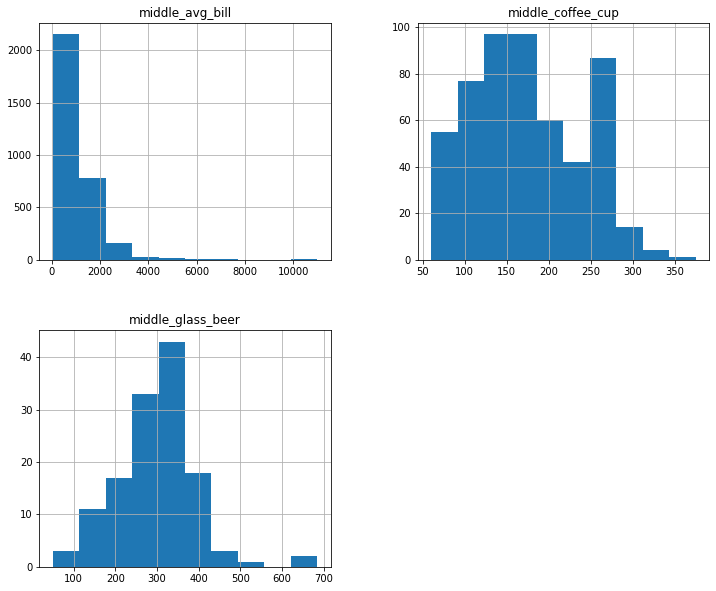

In [42]:
# Выводим гистограммы
df_rest_01[['middle_avg_bill', 'middle_coffee_cup', 'middle_glass_beer']].hist(figsize=(12, 10))
plt.show()

В столбце `middle_avg_bill` правое ассиметричное распределение, что говорит о высокой частоте низких цен и редких высоких значениях, которые формируют правый хвост.

В столбце `middle_coffee_cup` распределение правое ассиметричное, но ближе к нормальному. Присутствует больше средних цен,часто встречаются и низкие цены, намного чаще чем высокие. Есть всплеск цен примерно на уровне 260 рублей за чашку кофе.

В столбце `middle_glass_beer`распределение уже больше похоже на нормальное. Большинство цен на среднем уровне, совсем мало низких и высоких цен. Рост цен от низких к средним идет плавным ростом, распределение от средних цен к высоким обрывисто и с резкими спадами.

In [43]:
# Выводим основные статистические показатели столбца 'middle_avg_bill'
df_rest_01['middle_avg_bill'].describe()

count     3143.000000
mean       948.439389
std        808.827519
min         30.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      11000.000000
Name: middle_avg_bill, dtype: float64

Очень большое стандартное отклонение, что говорит о большом разбросе значений. Значит и среднее значение смещено в сторону выбросов. Попробуем разделить цены на категории с помощью медианы и процентилей, так как эти показатели устойчивы к выбросам. Сделаем так, чтобы категория цен "средние" включала в себя медиану с отклонениями в стороны по 20%, то есть от 0.3 процентиля до 0.7. В категорию цен "выше среднего" войдут значения находящиеся в диапозоне от 0.7 до 0.9 процентилей. В категорию цен "низкие" войдут значения лежащие за 0.3 процентилем, а в категорию цен "высокие" войдет все, что лежит за 0.9 процентилем. Применим такой способ разделения на категории для всех столбцов с ценами.

In [44]:
# Посмотрим какие будут значения границ наших диапозонов
df_rest_01[['middle_avg_bill', 'middle_coffee_cup', 'middle_glass_beer']].describe(percentiles=[0.3, 0.7, 0.9])

,middle_avg_bill,middle_coffee_cup,middle_glass_beer
count,3143.000000,534.000000,131.000000
mean,948.439389,172.065543,301.015267
std,808.827519,65.336288,95.784693
min,30.000000,60.000000,50.000000
30%,404.000000,135.000000,274.000000
50%,750.000000,168.000000,305.000000
70%,1200.000000,210.000000,345.000000
90%,2000.000000,256.000000,390.000000
max,11000.000000,375.000000,685.000000


Для среднего счета такие диапозоны смотрятся хорошо, но для цены за чашку кофе и бокал пива такие границы не подойдут. Так как в столбцах `middle_coffee_cup` и `middle_glass_beer` среднее значение и медиана находятся близко друг к другу и их гистограммы близки к равномерным распределениям, то поделим весь диапозон цен на равные промежутки, которые и будут характеризовать наши категории.

In [45]:
# Находим 0.3 0.7 и 0.9 процентили
per_03 = df_rest_01['middle_avg_bill'].quantile(0.3)
per_07 = df_rest_01['middle_avg_bill'].quantile(0.7)
per_09 = df_rest_01['middle_avg_bill'].quantile(0.9)

# Делим на категории столбец 'middle_avg_bill' и сохраняем полученный результат
df_rest_01['bill'] = pd.cut(df_rest_01['middle_avg_bill'],
                            bins=[-np.inf, per_03, per_07, per_09, np.inf],
                            labels=['низкие', 'средние', 'выше среднего', 'высокие'])

In [46]:
# Применим функцию, чтобы разбить на категории каждый из столбцов
def category_price(column):
    """
    Функция делит столбцы на категории,
    разделяя на равные промежутки весь диапозон цен
    от минимальной до максимальной.
    """
    return pd.cut(column, bins=4, labels=['низкие', 'средние', 'выше среднего', 'высокие'])

# Применяем функцию к каждому столбцу и сохраняем результат в новых столбцах
df_rest_01['coffee'] = category_price(df_rest_01['middle_coffee_cup'])
df_rest_01['beer'] = category_price(df_rest_01['middle_glass_beer'])

# Посмотрим на полученный результат
df_rest_01[['bill', 'coffee', 'beer']]

,bill,coffee,beer
0,NaN,NaN,NaN
1,выше среднего,NaN,NaN
2,средние,NaN,NaN
3,NaN,средние,NaN
4,средние,NaN,NaN
...,...,...,...
8401,NaN,NaN,NaN
8402,NaN,NaN,NaN
8403,низкие,NaN,NaN
8404,NaN,NaN,NaN


Мы получили три новых столбца, в которых значения цены поменялись на категории. Пропуски остались на своих местах. Теперь надо объединить эти три столбца в один.

In [47]:
# Добавляем пустую строку в категории для каждого столбца и заменяем "NaN" на пустую строку
df_rest_01['bill'] = df_rest_01['bill'].cat.add_categories('').fillna('')
df_rest_01['coffee'] = df_rest_01['coffee'].cat.add_categories('').fillna('')
df_rest_01['beer'] = df_rest_01['beer'].cat.add_categories('').fillna('')

# Преобразуем столбцы в строковый тип
df_rest_01['bill'] = df_rest_01['bill'].astype(str)
df_rest_01['coffee'] = df_rest_01['coffee'].astype(str)
df_rest_01['beer'] = df_rest_01['beer'].astype(str)

# Объединяем столбцы и сохраняем полученный результат
df_rest_01['cat_price'] = df_rest_01['bill'] + df_rest_01['coffee'] + df_rest_01['beer']

# Заменяем пустые строки на пропуски
df_rest_01['cat_price'] = df_rest_01['cat_price'].replace('', np.nan)

# Удалим временные столбцы и столбец с некорректными категориями
df_rest_02 = df_rest_01.drop(columns=['bill', 'coffee', 'beer', 'price'])

# Посмотрим информацию измененого датафрейма
df_rest_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7870 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 7870 non-null   object  
 1   name               7870 non-null   object  
 2   category           7870 non-null   category
 3   address            7870 non-null   object  
 4   district           7870 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             7870 non-null   float32 
 7   chain              7870 non-null   int8    
 8   seats              4495 non-null   float64 
 9   avg_bill           3808 non-null   object  
 10  middle_avg_bill    3143 non-null   float64 
 11  middle_coffee_cup  534 non-null    float64 
 12  middle_glass_beer  131 non-null    float64 
 13  cat_price          3808 non-null   object  
dtypes: category(1), float32(1), float64(4), int8(1), object(7)
memory usage: 784.3+ KB


In [48]:
# Теперь посмотрим на строки с пропущенными значениями в столбце 'seats'
df_rest_02[df_rest_02['seats'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer,cat_price
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,NaN,средние
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,NaN,NaN,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN,NaN
12,9384a51a4b2749759234df689b3a4857,Заправка,кафе,"Москва, МКАД, 80-й километр, 1",Северный административный округ,вт-сб 09:00–18:00,4.3,0,NaN,Средний счёт:330 ₽,330.0,NaN,NaN,низкие
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8386,9499032946a443b890635147cdebb9a6,Греки Здесь,ресторан,"Москва, улица Авиаконструктора Миля, 3А",Юго-Восточный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.1,0,NaN,NaN,NaN,NaN,NaN,NaN
8387,962800540173458486f3c465437c2d8b,Pab&burg,"бар,паб","Москва, улица Михайлова, 22, корп. 4",Юго-Восточный административный округ,"ежедневно, 12:00–21:30",4.2,0,NaN,Цена бокала пива:от 140 ₽,NaN,NaN,140.0,низкие
8389,3e5d9167d59248a69e6f3d6a0749d38c,Assa,ресторан,"Москва, улица Авиаконструктора Миля, 3А",Юго-Восточный административный округ,"пн-чт 09:00–22:00; пт,сб 09:00–23:00; вс 09:00...",4.9,0,NaN,NaN,NaN,NaN,NaN,NaN
8392,c55cb77b463b489491e703b8a94f286a,Касабланка,кафе,"Москва, Большая Косинская улица, 27",Восточный административный округ,пн-чт 08:00–17:00; пт 08:00–16:00,3.3,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Посчитаем долю пропущеных строк в столбце 'seats'
df_rest_02['seats'].isna().mean()

0.42884371029224905

Очень большое количество пропусков в этом столбце. Ранее мы заметили, что количество посадочных мест может сильно отличаться, даже если заведения относятся к одной сети. Это все говорит о том, что лучше не заменять пропуски, чтобы не искажать исследовательский анализ данных. Удалять их тоже не будем, иначе потеряем много информации. При детальном рассмотрении данных можно увидеть много нулевых значений и несколько очень высоких, где больше 1000 посадочных мест. За ошибки такие данные трудно интерпритировать. С нулевым значением это могут быть киоски бысрого питания или заведения, которые работают только на вынос. Заведений, где посадочных мест больше 1000, несколько и это странно, но допустим, что это действительно очень большие комплексы. Поэтому исправлять в этом столбце ничего не будем, оставим его как есть.

Природу пропусков в этом столбце трудно установить. Попробуем проанализировать возможные взаимосвязи с другими данными.

In [50]:
# создадим новый столбец с бинарным признаком в зависимости от наличия данных
# сначало мы возвращаем False, если значение пропущено, или True, если значение есть
# после преобразуем True в 1 и False в 0
df_rest_02['is_seats'] = df_rest_02['seats'].notna().astype(int)

# Проводим агрегацию данных по полю is_seats
df_rest_02.groupby('is_seats').agg({
    'chain':'mean',
    'rating':'mean'
})

,chain,rating
is_seats,,
0,0.365037,4.233541
1,0.413126,4.252169


Можно заметить, что у несетевых заведений пропуски встречаются немного чаще. Сильной взаимосвязи не видно. Похоже, что пропуски в этом столбце случайны и вызваны техническими ошибками или человеческими факторами.

В процессе обработки пропущенных значений провели следующие изменения:
- Удалили строки с пропусками из столбца `hours`, что составило примерно 6% от всех строк.
- Создали новый столбец `middle_glass_beer`, как дополнение к столбцам `middle_avg_bill` и `middle_coffee_cup`.
- Обнаружили некорректное разделение категорий в столбце `price`, ценовые диапозоны накладывались друг на друга, поэтому заново разделили цены на категории в каждом столбце с ценами и объединили их в один новый столбец `cat_price`.

В столбце `seats` обнаружили много пропусков, 0.43% от всех строк. Оставили их как есть, чтобы не искажать данные в процессе замены пропусков и не потерять важную информацию из-за удаления пропусков. Если пропуски в этом столбце будут вызывать ошибки, то заменим их на индикатор "-1" по необходимости.

In [51]:
# Проверим дубликаты в столбце 'id'
df_rest_02.duplicated(subset='id').sum()

0

Каждая строка нашего датафрейма соответствует уникальному заведению, поэтому можно сказать, что явные дубликаты отсутствуют.

Во время работы с пропусками и типами данных мы исследовали столбец `сategory` и не обнаружили там неявных дубликатов. Проверим другие столбцы с категориальными данными.

In [52]:
# Выводим уникальные значения столбца 'district'
df_rest_02['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

В столбце `district` отсутствуют неявные дубликаты.

In [53]:
# Выведем количество уникальных значений в остальных текстовых столбцах
df_rest_02[['hours', 'name', 'address']].nunique()

hours      1307
name       5313
address    5460
dtype: int64

Остальные текстовые столбцы уже трудно просмотреть визуально из-за большого количества значений. Проведем их нормализацию, сделав все буквы нижнего регистра и убрав пробелы в начале и конце строки.

In [54]:
# Нормализуеи несколько столбцов с помощью цикла
for column in ['name', 'address', 'hours']:
    # Приводим все строки к нижнему регистру
    df_rest_02[column] = df_rest_02[column].str.lower()
    # Удаляем пробелы в начале и конце строк
    df_rest_02[column] = df_rest_02[column].str.strip()

In [55]:
# Посмотрим есть ли заведения с одинаковым названием, адресом и временем работы
df_rest_02[['name', 'address', 'hours']].duplicated().sum()

0

In [56]:
# Посмотрим есть ли заведения с одинаковым названием и адресом
df_rest_02[['name', 'address']].duplicated().sum()

3

In [57]:
# Выведем найденные дубликаты
df_rest_02[df_rest_02[['name', 'address']].duplicated(keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer,cat_price,is_seats
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN,NaN,0
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN,NaN,1
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN,NaN,1
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN,NaN,1
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN,NaN,1


Теперь с большей увереностью можно сказать, что неявные дубликаты отсутсвуют и каждая строка это разные заведения.

Во время обработки данных индексы изменились и уже не идут по порядку, заменим старые индексы на новые и упорядочим их. И переименуем датафрейм для удобства в дальнейшей работе.

In [58]:
# Сбрасываем старый индекс и делаем новый непрерывный
rest = df_rest_02.reset_index(drop=True)
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 7870 non-null   object  
 1   name               7870 non-null   object  
 2   category           7870 non-null   category
 3   address            7870 non-null   object  
 4   district           7870 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             7870 non-null   float32 
 7   chain              7870 non-null   int8    
 8   seats              4495 non-null   float64 
 9   avg_bill           3808 non-null   object  
 10  middle_avg_bill    3143 non-null   float64 
 11  middle_coffee_cup  534 non-null    float64 
 12  middle_glass_beer  131 non-null    float64 
 13  cat_price          3808 non-null   object  
 14  is_seats           7870 non-null   int64   
dtypes: category(1), float32(1), float64(4), int64(1), int8(

Явные и неявные дубликаты не обнаружены. Заменили старые индексы на новые и переименовали датафрейм для удобства в дальнейшей работе.

Ежедневно работают почти все заведения, круглосуточно работают лишь некоторые из них. Есть заведения , которые работают круглосуточно, но не каждый день. Нам подойдут только те, что работают ежедневно и круглосуточно с абривиатурой "ежедневно, круглосуточно". Именно такое значение будем искать в столбце `hours`.

In [59]:
# Применяем поиск подстрок, чтобы создать новый столбец со значениями "False" и "True"
rest['is_24_7'] = (
    rest['hours'].str.contains('ежедневно', na=False) & 
    rest['hours'].str.contains('круглосуточно', na=False)
)

# Выведем весь датафрейм и посмотрим значения в новом столбце
rest

,id,name,category,address,district,hours,rating,chain,seats,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer,cat_price,is_seats,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,Средний счёт:1500–1600 ₽,1550.0,NaN,NaN,выше среднего,1,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,Средний счёт:от 1000 ₽,1000.0,NaN,NaN,средние,1,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,NaN,средние,0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,Средний счёт:400–600 ₽,500.0,NaN,NaN,средние,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,NaN,1,False
7866,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,NaN,1,False
7867,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,Средний счёт:от 150 ₽,150.0,NaN,NaN,низкие,1,True
7868,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,NaN,1,True


In [60]:
# Проверим общую информацию
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 7870 non-null   object  
 1   name               7870 non-null   object  
 2   category           7870 non-null   category
 3   address            7870 non-null   object  
 4   district           7870 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             7870 non-null   float32 
 7   chain              7870 non-null   int8    
 8   seats              4495 non-null   float64 
 9   avg_bill           3808 non-null   object  
 10  middle_avg_bill    3143 non-null   float64 
 11  middle_coffee_cup  534 non-null    float64 
 12  middle_glass_beer  131 non-null    float64 
 13  cat_price          3808 non-null   object  
 14  is_seats           7870 non-null   int64   
 15  is_24_7            7870 non-null   bool    
dtypes: boo

---

### Промежуточный вывод

**Общий итог после предобработки данных:**
- В столбце `category` поменяли тип данных на `category`.
- Оптимизировали размерность данных в столбцах `rating` и `chain`.
- Удалили 536 строк с пропусками из столбца `hours`, что составило примерно 6% от всех строк.
- Создали новый столбец `middle_glass_beer`, как дополнение к столбцам `middle_avg_bill` и `middle_coffee_cup`.
- Создали новый столбец `cat_price`, в котором корректно разделили цены на категории.
- Создали новый столбец `is_24_7` с булевыми значениями, в котором показали работает ли заведение ежедневно и круглосуточно.
- В столбце `seats` обнаружили много пропусков, 0.38% от всех строк, оставили их как есть.
- Проверили датафрейм на явные и неявные дубликаты, они не обнаружены.

[содержание](#start)

<a id='study'></a>
## 3. Исследовательский анализ данных

In [61]:
# Посмотрим какие категории есть и сколько объектов входит в каждую категорию
rest['category'].value_counts()

кафе               2003
ресторан           1969
кофейня            1398
бар,паб             747
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: category, dtype: int64

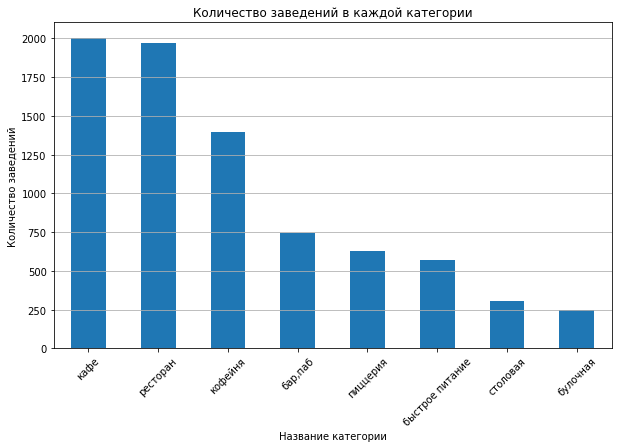

In [62]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
rest['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

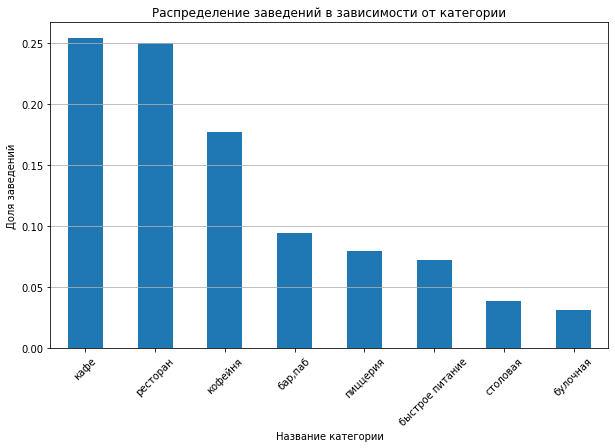

In [63]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
rest['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Больше всего заведений находится в категории кафе - 2003 и рестораны - 1969 объектов. К этим двум категориям относится половина от всех заведений. В категорию булочная входит меньше всего заведений - 249 объекта.

---

In [64]:
# Напишем функцию, которая сократит названия районов,
# чтобы было удобно их расположить на визуализации
def rename_district (row):
    """
    Функция, когда находит определенный район,
    возвращает его сокращенное название.
    """
    if row == 'Центральный административный округ':
        return 'ЦАО'      
    elif row == 'Северный административный округ':
        return 'САО'
    elif row == 'Южный административный округ':
        return 'ЮАО'
    elif row == 'Северо-Восточный административный округ':
        return 'СВАО'
    elif row == 'Западный административный округ':
        return 'ЗАО'
    elif row == 'Восточный административный округ':
        return 'ВАО'
    elif row == 'Юго-Западный административный округ':
        return 'ЮЗАО'
    elif row == 'Юго-Восточный административный округ':
        return 'ЮВАО'
    elif row == 'Северо-Западный административный округ':
        return 'СЗАО'

#  Применяем функцию к столбцу 'hours'
rest['district'] = rest['district'].apply(rename_district)

In [65]:
# Посмотрим какие районы есть и сколько заведений находится в каждом районе
rest['district'].value_counts()

ЦАО     2211
САО      846
СВАО     830
ЮАО      827
ЗАО      785
ВАО      723
ЮЗАО     650
ЮВАО     629
СЗАО     369
Name: district, dtype: int64

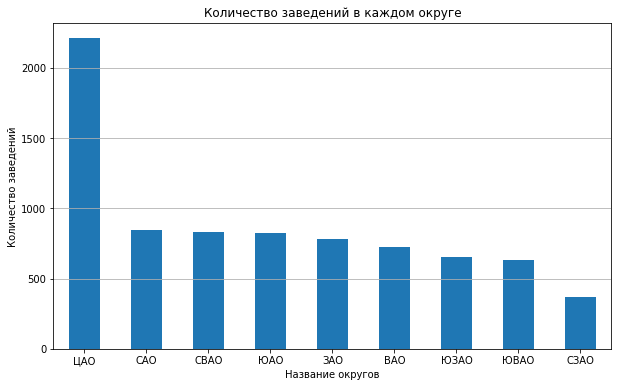

In [66]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
rest['district'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в каждом округе'
)

# Настраиваем оформление графика
plt.xlabel('Название округов')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

In [67]:
# Посчитаем количество заведений в каждой категории в ЦАО
centr_rest = rest[rest['district'] == 'ЦАО'].groupby('category')['id'].count().sort_values(ascending=False)
centr_rest

category
ресторан           665
кафе               444
кофейня            426
бар,паб            364
пиццерия           112
быстрое питание     85
столовая            65
булочная            50
Name: id, dtype: int64

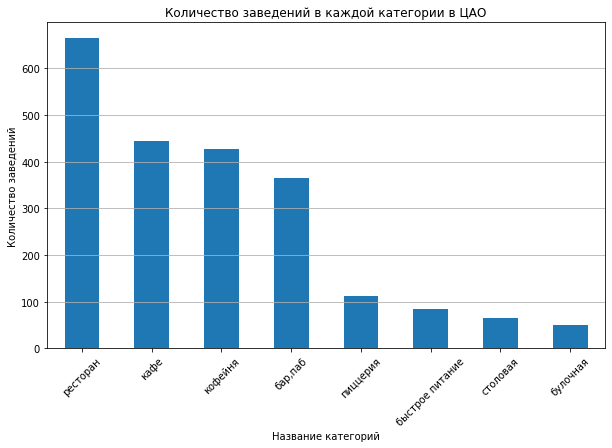

In [68]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
centr_rest.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество заведений в каждой категории в ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Название категорий')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Количество заведений по округам расположено неравномерно, большая часть находится в ЦАО. В центральном районе находится 1/3 всех заведений. Если посмотреть к каким категориям относятся заведения расположенные в ЦАО, то можно увидеть, что центре большинство заведений это рестораны.

---


In [69]:
# Проверяем относительное распределение между сетевыми и несетевыми заведениями
rest['chain'].value_counts(normalize=True)

0    0.607497
1    0.392503
Name: chain, dtype: float64

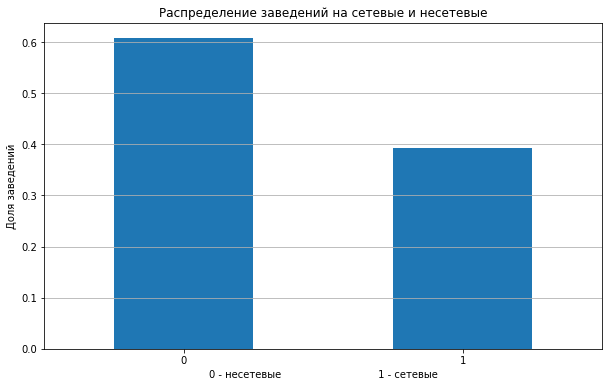

In [70]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
rest['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений на сетевые и несетевые'
)

# Настраиваем оформление графика
plt.xlabel('0 - несетевые                               1 - сетевые')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

In [71]:
# Проверяем относительное распределение между сетевыми и несетевыми заведениями в разрезе категорий
chain_in_cat = rest.groupby('category')['chain'].value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)
chain_in_cat

chain,0,1
category,,
булочная,0.381526,0.618474
пиццерия,0.474522,0.525478
кофейня,0.489270,0.510730
быстрое питание,0.607018,0.392982
ресторан,0.638395,0.361605
кафе,0.645032,0.354968
столовая,0.722222,0.277778
"бар,паб",0.787149,0.212851


<Figure size 864x720 with 0 Axes>

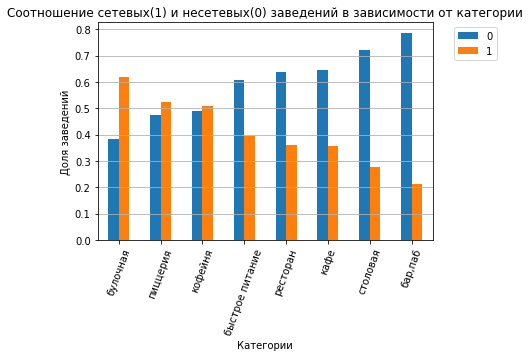

In [72]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 10))

# Строим столбчатую диаграмму
chain_in_cat.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=70, # Градус вращения подписи по оси Х
               legend=True, # Включаем легенду
               title=f'Соотношение сетевых(1) и несетевых(0) заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid(axis='y')

# Размещаем легенду справа от графика
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Выводим график
plt.show()

На рынке общественного питания доля несетевых заведений превышает сетевые. Если смотреть в разрезе категорий, то можно заметить, что булочные чаще являются сетевыми заведениями, примерно равные доли между сетевыми и несетевыми заведениями в кофейнях и пиццериях. В остальных категориях преобладают несетевые заведения.

---


In [73]:
# Выводим основные статистические показатели столбца 'seats'
rest['seats'].describe()

count    4495.000000
mean      107.845829
std       119.202354
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

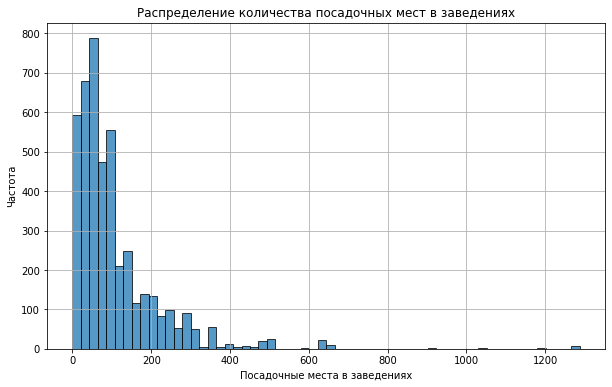

In [74]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму
rest['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=60, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Посадочные места в заведениях')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

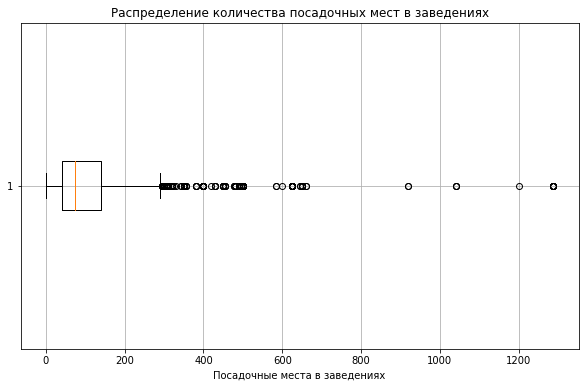

In [75]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха
plt.boxplot(rest['seats'].dropna(), # Убираем пропущенные значения
            vert=False)

# Добавляем заголовок, метки оси и сетку
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Посадочные места в заведениях')
plt.grid()
# Выводим график
plt.show()

In [76]:
# Проверим сколько объектов имеют 1000 и более посадочных мест
rest[rest['seats'] >= 1000]['seats'].value_counts()

1288.0    8
1040.0    3
1200.0    1
Name: seats, dtype: int64

In [77]:
# Выведем эти объекты
rest[rest['seats'] >= 1000]

,id,name,category,address,district,hours,rating,chain,seats,avg_bill,middle_avg_bill,middle_coffee_cup,middle_glass_beer,cat_price,is_seats,is_24_7
2540,8d07e2d1810b4dca9d4cb247d0335df3,ваня и гоги,"бар,паб","москва, измайловское шоссе, 71, корп. а",ВАО,"ежедневно, 11:00–06:00",4.2,0,1040.0,Средний счёт:1000–2500 ₽,1750.0,NaN,NaN,выше среднего,1,False
2549,4731af3e68bb449fb2b34493fadfaed1,маргарита,быстрое питание,"москва, измайловское шоссе, 71, корп. а",ВАО,"ежедневно, 10:00–22:00",4.3,1,1040.0,NaN,NaN,NaN,NaN,NaN,1,False
2593,4c196f841b0046b3ab3a60d3ed52bfc5,шоколадница,кофейня,"москва, измайловское шоссе, 71, корп. а",ВАО,"пн-ср 11:00–23:00; чт 11:00–00:00; пт,сб 11:00...",4.1,1,1040.0,NaN,NaN,NaN,NaN,NaN,1,False
3992,30d6c2abb42748bb98c01b1ed366e253,рестобар argomento,столовая,"москва, кутузовский проспект, 41, стр. 1",ЗАО,"ежедневно, 12:00–23:00",4.2,0,1200.0,Средний счёт:2500–5000 ₽,3750.0,NaN,NaN,высокие,1,False
6152,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",ЗАО,"ежедневно, круглосуточно",4.1,0,1288.0,Средний счёт:1500–2000 ₽,1750.0,NaN,NaN,выше среднего,1,True
6158,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",ЗАО,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,1,1288.0,Средний счёт:1500 ₽,1500.0,NaN,NaN,выше среднего,1,False
6206,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",ЗАО,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,1,1288.0,NaN,NaN,NaN,NaN,NaN,1,False
6273,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",ЗАО,"ежедневно, 08:30–20:00",4.3,1,1288.0,NaN,NaN,NaN,NaN,NaN,1,False
6290,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",ЗАО,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,0,1288.0,Средний счёт:700 ₽,700.0,NaN,NaN,средние,1,False
6429,ba5a32dfee6c4661a25c0ea2d39f393d,loft-cafe академия,кафе,"москва, проспект вернадского, 84, стр. 1",ЗАО,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,0,1288.0,NaN,NaN,NaN,NaN,NaN,1,False


In [78]:
# Вычисляем наиболее типичное количество мест в каждой категории
median_seats = rest.groupby('category')['seats'].median().sort_values(ascending=False)
median_seats

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           73.5
быстрое питание    69.5
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

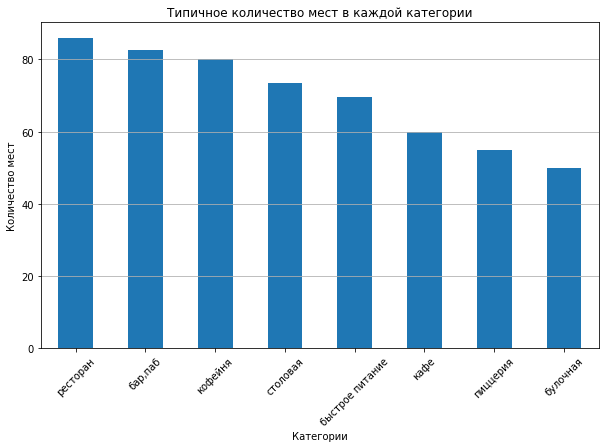

In [79]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
median_seats.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Типичное количество мест в каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Количество мест')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

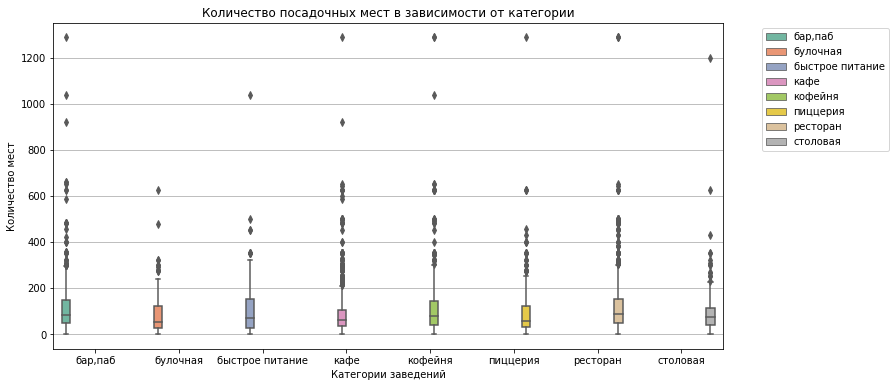

In [80]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 6))

# Строим 
sns.boxplot(data=rest, x='category', y='seats', hue='category', palette='Set2')

# Подписываем график и оси
plt.title('Количество посадочных мест в зависимости от категории')
plt.xlabel('Категории заведений')
plt.ylabel('Количество мест')
# Добавляем сетку графика
plt.grid(axis='y')
# Размещаем легенду справа от графика
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Выводим график
plt.show()

Значения в столбце `seats` распределены от 0 до 1288 посадочных мест, медиана и среднее значение различаются. Гистограмма имеет правое ассиметричное распределение, что говорит о наличии высоких значений. Диаграмма размаха показывает, что выбросы начинаются с объектов у которых более 350 посадочных мест. Таких объектов достаточно много в диапозоне от 300 до 700 посадочных мест, их точно не стоит считать выбросами. Скорее всего это заведения с большой площадью, которых в совокупности меньше, чем небольших заведений. Есть 12 заведений у которых более 1000 посадочных мест. Возможно здесь уже есть ошибка в данных, поэтому выбросы стоит поднять до границы в 1000 посадочных мест, чтобы не терять много данных и полностью не исключить группу крупных заведений.

Если посмотреть медиану количества мест в каждой категории, то увидим что они распределены от 50 до 86 мест в заведении. Рестораны и бары имеют большую вместимость, у булочных меньшая вместимость.

---

In [81]:
# Выводим основные статистические показатели столбца 'rating'
rest['rating'].describe()

count    7870.000000
mean        4.244180
std         0.452966
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

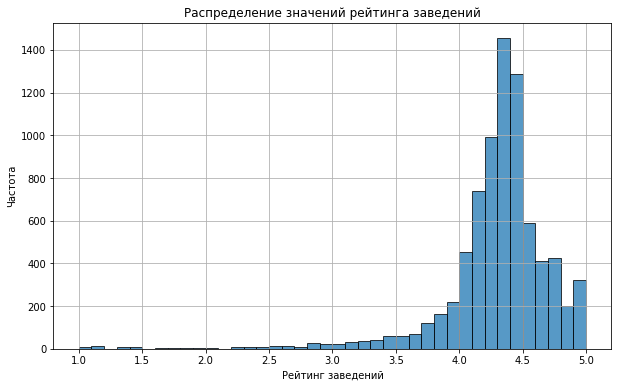

In [82]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим гистограмму
rest['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=40, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг заведений')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

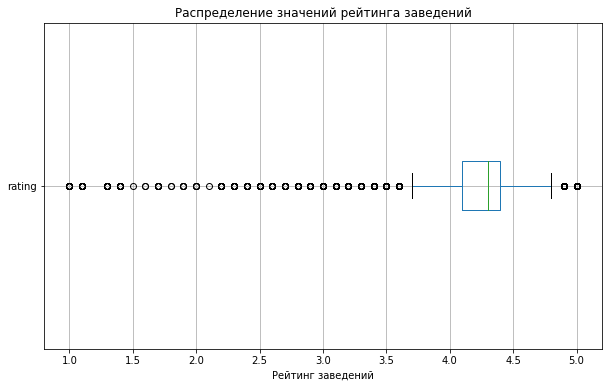

In [83]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха
rest.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг заведений')

# Выводим график
plt.show()

In [84]:
# Вычисляем среднее значение рейтинга для каждой категории
mean_rating_category = round(rest.groupby('category')['rating'].mean().sort_values(ascending=False), 1)
mean_rating_category

category
бар,паб            4.4
пиццерия           4.3
ресторан           4.3
булочная           4.3
кофейня            4.3
столовая           4.2
кафе               4.2
быстрое питание    4.1
Name: rating, dtype: float32

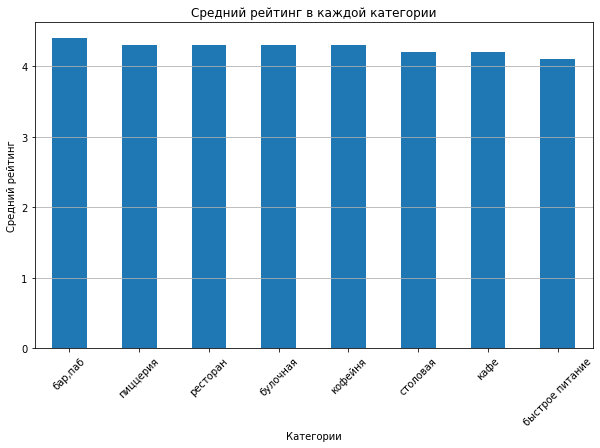

In [85]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
mean_rating_category.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний рейтинг в каждой категории'
)

# Настраиваем оформление графика
plt.xlabel('Категории')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

In [86]:
# Вычисляем среднее значение рейтинга для каждого округа
mean_rating_district = round(rest.groupby('district')['rating'].mean().sort_values(ascending=False), 1)
mean_rating_district

district
ЦАО     4.4
САО     4.3
СЗАО    4.2
ЗАО     4.2
ЮЗАО    4.2
ВАО     4.2
ЮАО     4.2
СВАО    4.2
ЮВАО    4.1
Name: rating, dtype: float32

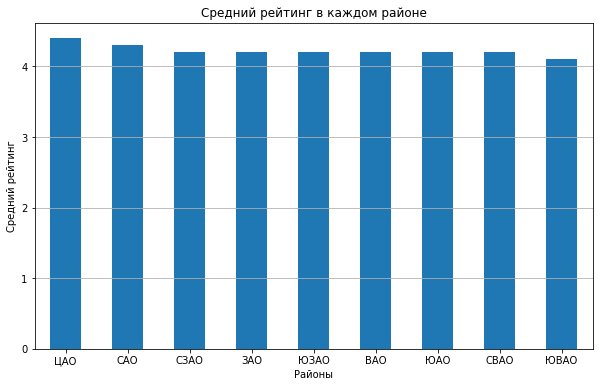

In [87]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
mean_rating_district.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний рейтинг в каждом районе'
)

# Настраиваем оформление графика
plt.xlabel('Районы')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Распределение рейтингов на гистограмме выглядит ассиметрично и скошено влево, при этом медиана и среднее значение находятся близко. Это говорит о том, что маленькие значения рейтинга в левой части гистограммы очень редкие. Чаще всего рейтинги лежат в диапозоне от 4.1 до 4.4. Шкала рейтинга находится в диапозоне от 1 до 5. Все значения рейтинга в этом диапазоне несут информационную ценность, поэтому любые значения в этом диапазоне не будем считать выбросами.

Если посмотреть на средний рейтинг в каждой категории, то увидим, что они распределены равнромерно. Но можно отметить бары и пабы, их средний рейтинг немного выше, чем у остальных категорий.

Если посмотреть средний рейтинг по округам, также увидим равномерное распределение и отметим, что в цетре рейтинг немного повыше, чем в других районах.

---


Так как придется изучать связи между значениями разных типов данных, то применим для этого матрицу корреляции 'phi_k'.

In [88]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = rest[['category', 'district', 'chain', 'seats', 'cat_price',
                         'is_24_7', 'rating']].phik_matrix(interval_cols=['seats', 'rating'])

# Оставляем только столбец 'rating'
corr_matrix = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
corr_matrix

,rating
cat_price,0.285752
category,0.190413
is_24_7,0.185718
district,0.185303
chain,0.121678
seats,0.000000


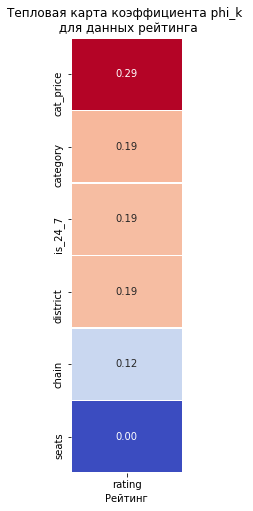

In [89]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(2, 8))

# Строим тепловую карту
sns.heatmap(corr_matrix,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5,# Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных рейтинга')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Самое большое значение корреляции с рейтингом у данных, которые показывают категорию цены - 0.29. В целом это слабая корреляция, проверим ее, расчитав среднее значение для каждой категории цены.

In [90]:
# Вычисляем среднее значение рейтинга для каждой категории
mean_rating_price = round(rest.groupby('cat_price')['rating'].mean().sort_values(ascending=False), 2)
mean_rating_price

cat_price
высокие          4.45
выше среднего    4.38
средние          4.32
низкие           4.19
Name: rating, dtype: float32

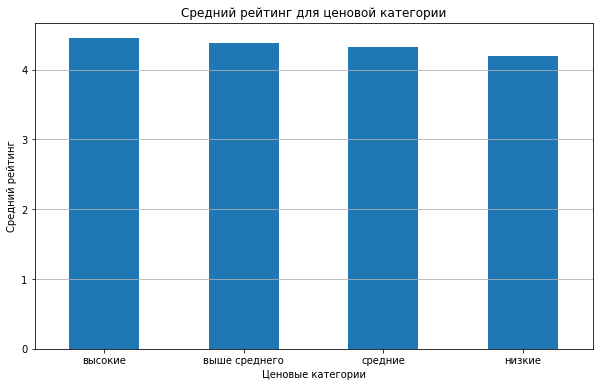

In [91]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 6))

# Строим столбчатую диаграмму
mean_rating_price.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний рейтинг для ценовой категории'
)

# Настраиваем оформление графика
plt.xlabel('Ценовые категории')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

Взаимосвязь слабая, положительная. Чем выше ценовая категория, тем выше средний рейтинг. Увеличение рейтинга происходит на сотые доли, поэтому распределение на столбчатой диаграмме выглядит практически равномерным.

---

In [92]:
# Создадим сводную таблицу
top_chain = rest[rest['chain'] == 1].pivot_table(
    index=['name', 'category'],
    aggfunc={'id': 'count', 'rating': 'mean'}
)

top_chain = top_chain.sort_values(by='id', ascending=False).head(15)
top_chain = top_chain.reset_index()
top_chain

,name,category,id,rating
0,шоколадница,кофейня,119,4.178151
1,домино'с пицца,пиццерия,76,4.169737
2,додо пицца,пиццерия,74,4.286487
3,one price coffee,кофейня,71,4.064789
4,яндекс лавка,ресторан,68,3.870588
5,cofix,кофейня,65,4.075385
6,prime,ресторан,49,4.114285
7,кофепорт,кофейня,42,4.147619
8,кулинарная лавка братьев караваевых,кафе,39,4.394872
9,теремок,ресторан,36,4.105556


In [93]:
# Посмотрим какие категории чаще встречаются в Топ-15
top_chain.groupby('category')['name'].count().sort_values()

category
бар,паб            0
быстрое питание    0
столовая           0
булочная           1
кафе               2
пиццерия           2
ресторан           3
кофейня            7
Name: name, dtype: int64

In [94]:
# проверим взаимосвязь между рейтингом и количеством заведений в сети
top_chain[['id', 'rating']].corr(method='spearman')

,id,rating
id,1.000000,0.067918
rating,0.067918,1.000000


Взаимосвязь отсутствует.

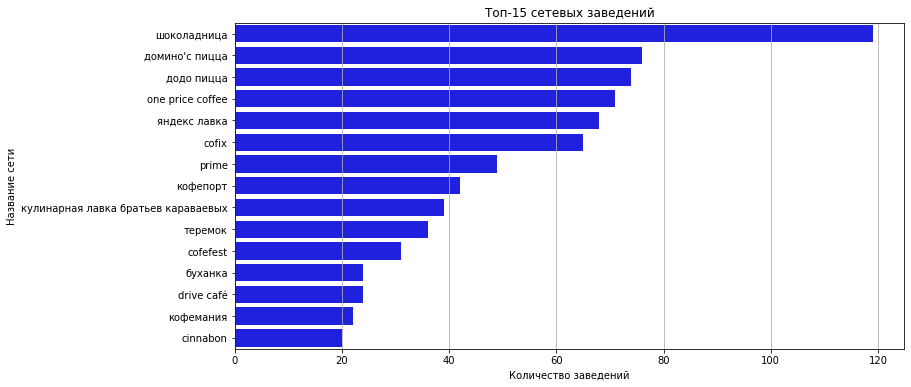

In [95]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 6))

# Строим график
sns.barplot(x='id', y='name', data=top_chain, color='blue')

# Подписываем график и оси
plt.title('Топ-15 сетевых заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
# Добавляем сетку графика
plt.grid(axis='x')

# Выводим график
plt.show()

Лидером из Топ-15 является сеть кофеен "шоколадница", у нее 119 заведения. Рейтинги у всех заведений из Топ-15 окло "4" и выше. Наблюдается отрицательная нелинейная умеренная корреляция между рейтингом и количеством заведений в сети. Чаще всего в Топ-15 встречаются кофейни.

---

In [96]:
# Выведем статистику средних цен для каждого района Москвы
rest.groupby('district')['middle_avg_bill'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
ЦАО,1057.0,1192.270577,920.620136,67.0,500.00,1000.0,1500.0,7250.0
ЗАО,305.0,1053.072131,780.284122,50.0,425.00,1000.0,1500.0,5250.0
САО,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
СЗАО,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
ВАО,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
ЮЗАО,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
ЮАО,312.0,735.339744,565.146164,100.0,350.00,500.0,1062.5,3500.0
СВАО,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
ЮВАО,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0


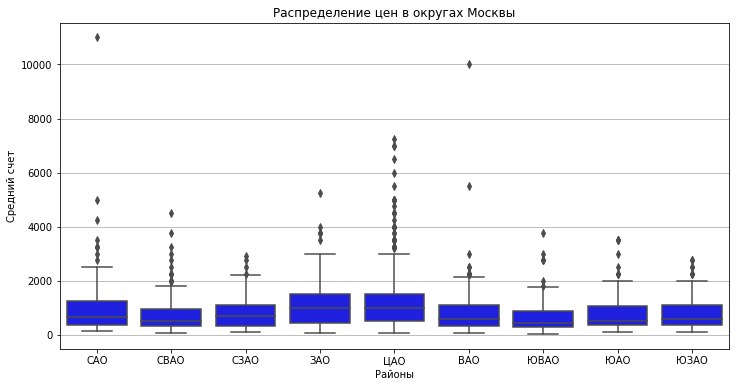

In [97]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграммы размаха
sns.boxplot(x='district', y='middle_avg_bill', data=rest, color='blue')

# Подписываем график и оси
plt.title('Распределение цен в округах Москвы')
plt.xlabel('Районы')
plt.ylabel('Средний счет')
# Добавляем сетку графика
plt.grid(axis='y')

# Выводим график
plt.show()

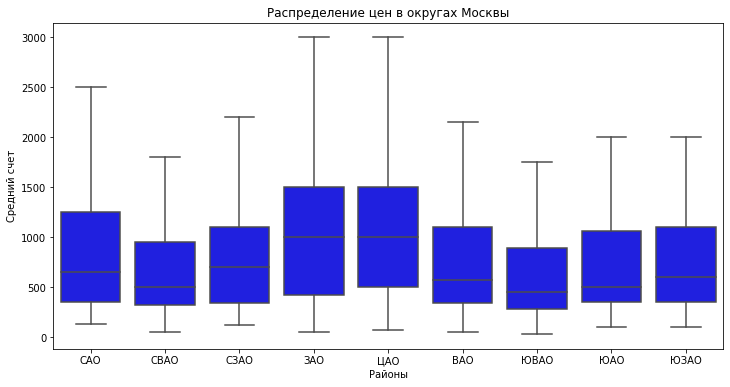

In [98]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграммы размаха и отключаем выбросы
sns.boxplot(x='district', y='middle_avg_bill', data=rest, color='blue', showfliers=False)

# Подписываем график и оси
plt.title('Распределение цен в округах Москвы')
plt.xlabel('Районы')
plt.ylabel('Средний счет')

# Выводим график
plt.show()

Самое высокое среднее значение среднего счета в Центральном административном округе, так как там много заведений с чеком выше среднего и заведений в этом районе больше. Наиболее близок к Центральному округу по среднему счету Западный округ. В остальных округах средний счет становится заметно ниже. Стоит отметить, что в Северном и Восточном округах средний счет завышен из-за единичных заведений в которых цены значительно превышают среднее значение, поэтому лучше ориентироваться на показатели медианы. Самый низкий показатель среднего счета наблюдается в Южно-Восточном округе. Если не учитывать Центральный округ, то в северо-западной части Москвы средний счет выше, чем в южно-восточной части.

---

---

### Промежуточный вывод

**Итоги исследовательского анализа:**
- Больше всего заведений находится в категории рестораны. В категорию булочная входит меньше всего заведений.
- В центральном районе находится 1/3 всех заведений.
- На рынке общественного питания доля несетевых заведений превышает сетевые. Если смотреть в разрезе категорий, то можно заметить, что булочные чаще являются сетевыми заведениями, примерно равные доли между сетевыми и несетевыми заведениями в кофейнях и пиццериях. В остальных категориях преобладают несетевые заведения.
- В среднем количество посадочных мест в заведениях от 50 до 86, различается в зависимости от категории заведения. Рестораны в среднем имеют большую вместимость, у булочных меньшая вместимость.
- Средний рейтинг немного выше у баров, пабов, чем у остальных категорий.
- Сети, в которых наибольшее количество заведений, обычно относятся к категориям кофеен и пиццерий.
- Самое высокое значение среднего счета в Центральном административном округе. Если не учитывать Центральный округ, то в северо-западной части Москвы средний счет выше, чем в южно-восточной части.

[содержание](#start)

<a id='result'></a>
## 4. Итоговый вывод и рекомендации


### Общий обзор проделанной работы

Создали общий датасет из двух таблиц, включающих в себя информацию о заведениях и информацию о среднем чеке. Получили 8406 строк  данных для каждого заведения. В ходе предобработки данных были удалены строки с пропусками, что составило 6% от всех строк. Были добавлены новые столбцы, показывающие среднюю цену за бокал пива и работает ли заведение круглосуточно. Заново создали исправленный столбец с категориями цен. Итоговый датасет, который исследовали, содержал 7870 строк и 16 столбцов.

В ходе исследовательского анализа были изучены категории и рейтинги заведений. Количество посадочных мест в зависимости от категорий, цены в зависимости от района города.

### Ответы на исследовательские вопросы, или главные выводы

Исследовательский анализ данных помог увидеть, что:
- чаще всего заведение относится к категории ресторанов, 
- большая часть заведений сосредоточена в Центральном округе,
- доля несетевых заведений превышает сетевые, кроме категорий булочные, пиццерии и кофейни,
- средний рейтинг немного выше у баров, пабов чем у остальных категорий,
- сети, в которых наибольшее количество заведений, обычно относятся к категориям кофеен и пиццерий,
- если не учитывать Центральный округ, то в северо-западной части Москвы средний счет выше, чем в южно-восточной части.



### Рекомендации на основе анализа данных

Можно отметить основываясь на среднем рейтинге, что посетителям больше нравятся заведения из категории бары, пабы.

Учитывая высокую конкуренцию в Центральном округе, лучше открыть заведение в северо-западной части города. Там средний чек тоже высокий, но заведений меньше.

[содержание](#start)